In [16]:
import pandas as pd

df_j2 = pd.read_csv("../test_sym_prop_j2.csv")
df_j2_elliptical = pd.read_csv("../test_sym_prop_j2_elliptical.csv")
df_hohmann = pd.read_csv("../test_hohmann_transfer.csv")

df_hohmann_bi = pd.read_csv("../test_hohmann_transfer_bielliptic.csv")
df_sim = pd.read_csv("../test_simulation_attitude.csv")


In [17]:
df_sim.describe()

x             y             z           vx           vy  \
count  8.641000e+03  8.641000e+03  8.641000e+03  8641.000000  8641.000000   
mean  -8.506065e+04  3.453462e+04 -1.064026e+04   -13.115763  -105.144425   
std    4.000497e+06  4.676509e+06  2.744293e+06  4612.604611  5304.568342   
min   -6.107450e+06 -6.724300e+06 -3.888080e+06 -7001.620000 -7716.790000   
25%   -4.061520e+06 -4.669470e+06 -2.753780e+06 -4625.480000 -5393.230000   
50%   -1.524380e+05  6.498230e+04 -1.995860e+04   -35.825500  -173.127000   
75%    3.874540e+06  4.718220e+06  2.726240e+06  4600.800000  5146.620000   
max    6.085120e+06  6.761970e+06  3.900000e+06  6983.850000  7695.390000   

                vz           q0           q1           q2           q3  
count  8641.000000  8641.000000  8641.000000  8641.000000  8641.000000  
mean     -8.138285     0.014096     0.006189    -0.009157     0.007845  
std    3188.407569     0.666093     0.390848     0.309743     0.554391  
min   -4505.820000    -0.997437    -0.717525    -0.594284    -0.901068  
25%   -3190.500000    -0.644203    -0.352255    -0.266197    -0.533524  
50%     -53.384400     0.024149    -0.016308    -0.011973     0.028045  
75%    3189.850000     0.677079     0.354616     0.242234     0.543078  
max    4520.830000     1.000000     0.718498     0.593052     0.896111

In [18]:
import matplotlib.pyplot as plt

def plot_states(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.scatter(df.index, df["q0"], s=10, c='b', label='q0')
    ax1.scatter(df.index, df["q1"], s=10, c='r', label='q1')
    ax1.scatter(df.index, df["q2"], s=10, c='g', label='q2')
    ax1.scatter(df.index, df["q3"], s=10, c='g', label='q3')
   
    plt.legend(loc='upper left')
    plt.show()

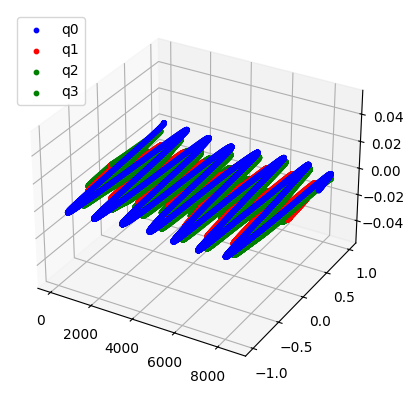

In [19]:
plot_states(df_sim)

In [5]:
import matplotlib.pyplot as plt

def plot_states_3d(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.scatter(df.x, df.y, df.z)
    plt.show()

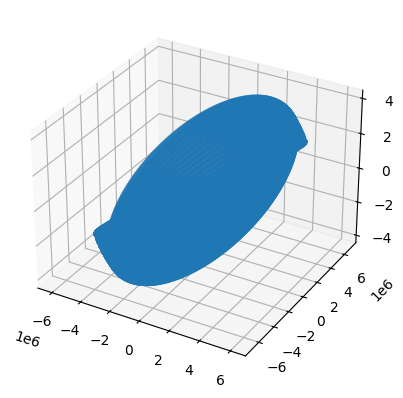

In [6]:
plot_states_3d(df_sim)

In [7]:
import numpy as np

from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter3d, Surface

init_notebook_mode(connected=True)

def plot_orbit(df):
    x_km = df.x / 1000.0
    y_km = df.y / 1000.0
    z_km = df.z / 1000.0
    trace = Scatter3d(
        x=x_km, y=y_km, z=z_km,
        line=dict(
            color='#000000',
            width=5,
        ),
        mode="lines",
    )
    
    radius = 6378
    
    uu, vv = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    xx = radius * np.cos(uu) * np.sin(vv)
    yy = radius * np.sin(uu) * np.sin(vv)
    zz = radius * np.cos(vv)
    
    planet = Surface(
        x=xx,
        y=yy,
        z=zz,
        cauto=False,
        cmin=1,
        cmax=1,
        colorscale=[[0, '#204a87'], [1, '#204a87']],
        showscale=False
        
    )
    
    
    data = [trace, planet]
    
    layout = dict(
        width=800,
        height=700,
        autosize=False,
        title='Orbit plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )
            ),
            
            # aspectratio = dict( x=1, y=1, z=1 ),
            aspectmode = 'data'
        ),
    )
    
    fig = dict(data=data, layout=layout)
    
    iplot(fig, filename='orbit-plot', image_height=700, validate=False)

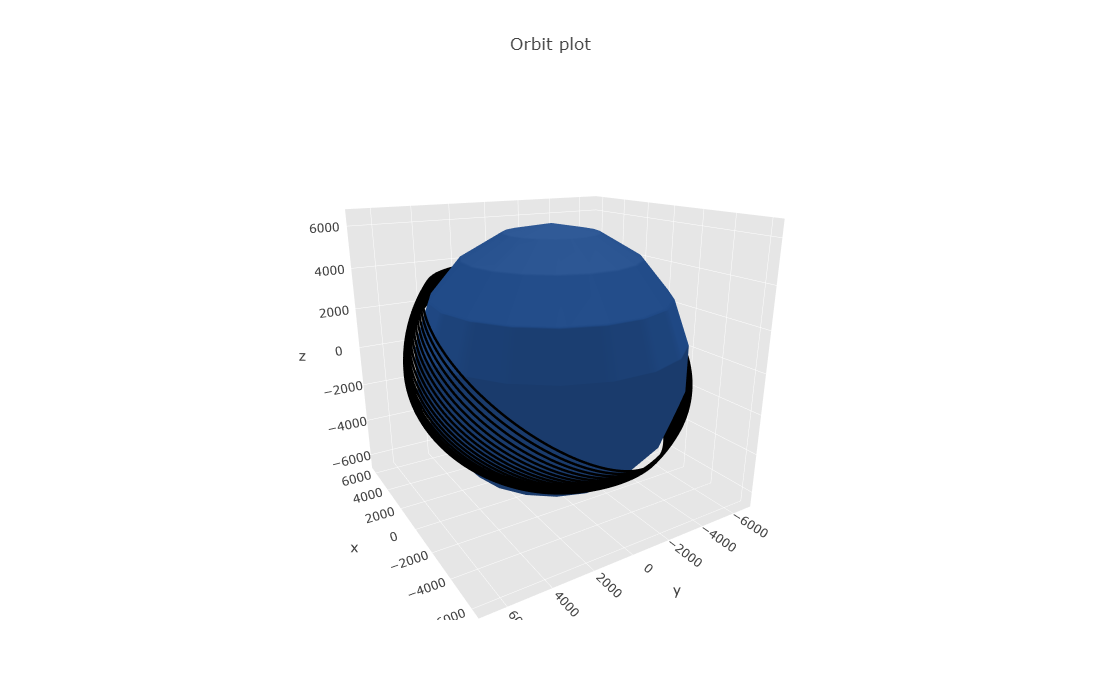

In [8]:
plot_orbit(df_sim)

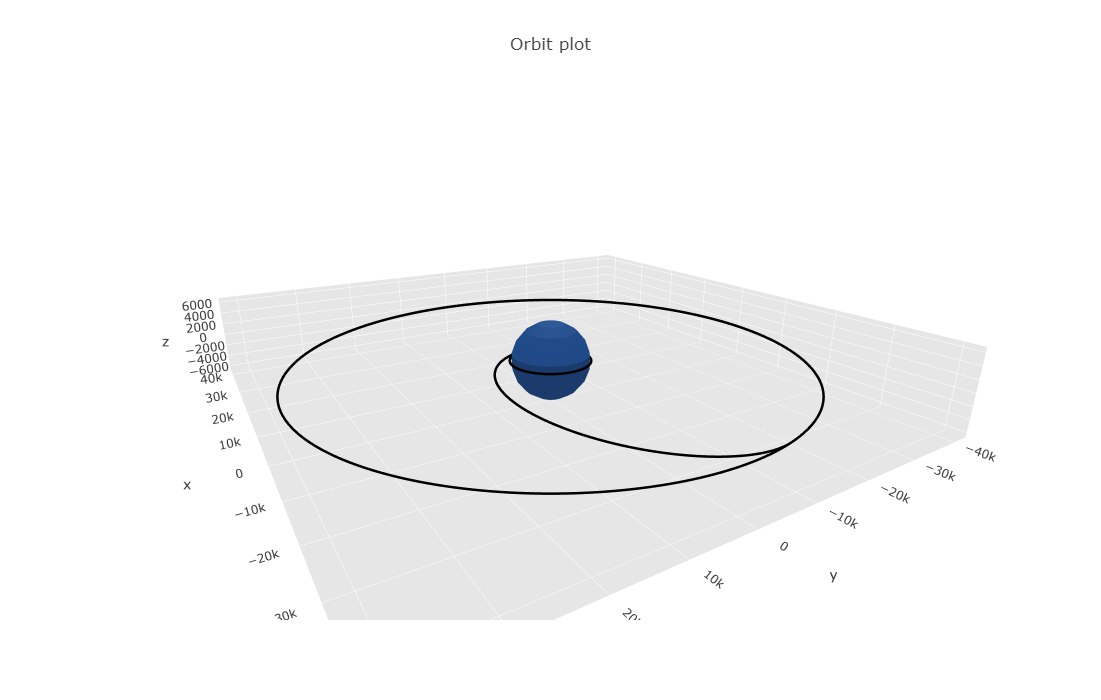

In [9]:
plot_orbit(df_hohmann)

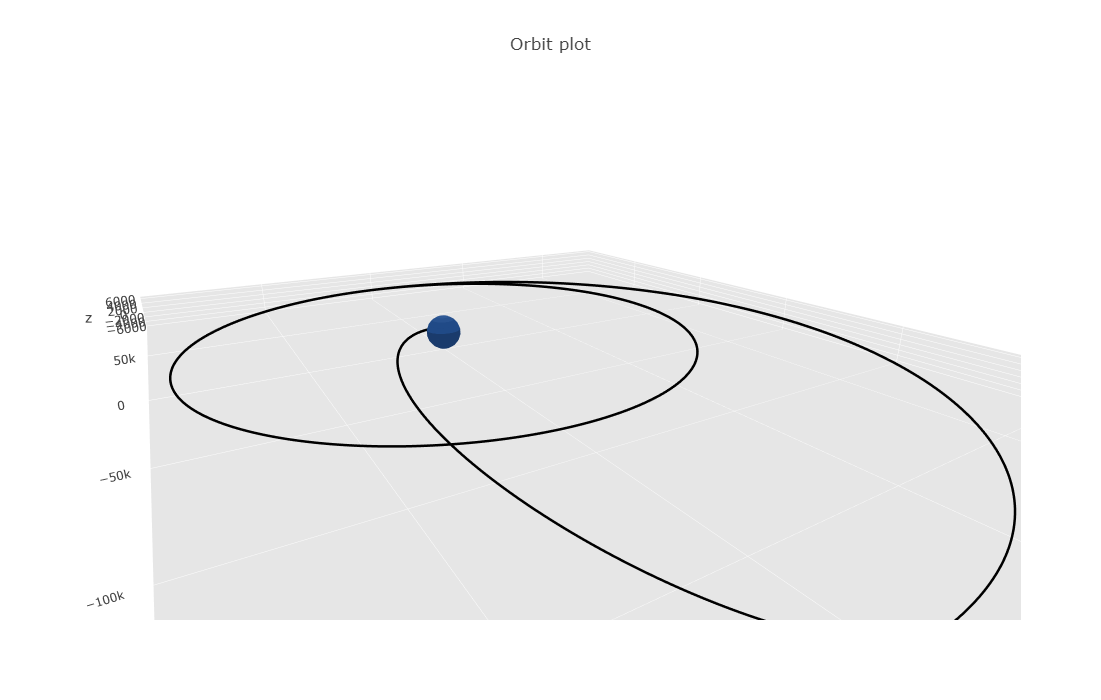

In [10]:
plot_orbit(df_hohmann_bi)